# Objective: To Visualize Data With Haberman Dataset

# (1.1) Importing the libraries and Dataset

In [1]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importing the dataset
haberman70 = pd.read_csv("haberman70.csv")

print (haberman70.shape)        # No.of data points and Features
print (haberman70.columns)
haberman70["Survival status"].value_counts()     # No.of class and data points per class in our data set

(306, 4)
Index(['Age of patient', 'year of operation',
       'Number of positive axillary nodes detected', 'Survival status'],
      dtype='object')


1    225
2     81
Name: Survival status, dtype: int64

**Observation(s):**
1. I found 306 data points and 4 features in the dataset.
2. I found 2 classes and 225 and 81 data points per class in our data set.

# (1.2) 2-D scatter plot:

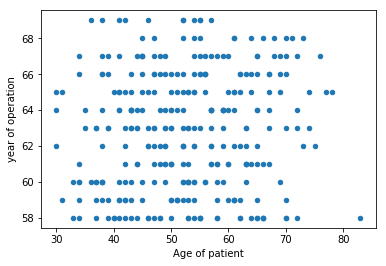

In [2]:
#2-D scatter plot:
haberman70.plot(kind='scatter', x='Age of patient', y='year of operation') # https://www.kaggle.com/gilsousa/habermans-survival-data-set
plt.show();


# (1.3) 2-D Scatter plot with color-coding:

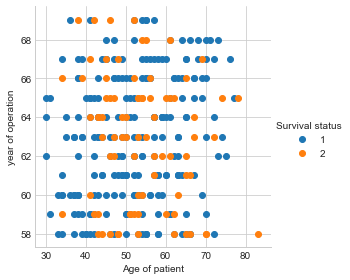

In [3]:
# 2-D Scatter plot with color-coding:
sns.set_style("whitegrid");
sns.FacetGrid(haberman70, hue="Survival status", size=4) \
   .map(plt.scatter, "Age of patient", "year of operation") \
   .add_legend();
plt.show();

**Observation(s):**
1. It is an unbalanced dataset.
2. We have 2 class label and we are not getting equal no. of data points for each of our class.
3. I see 74% of data points have value of 1. So they are surviving from the cancer.
4. Data points cannot be easily seperated by a single line.

# (1.4) Pair-plot:

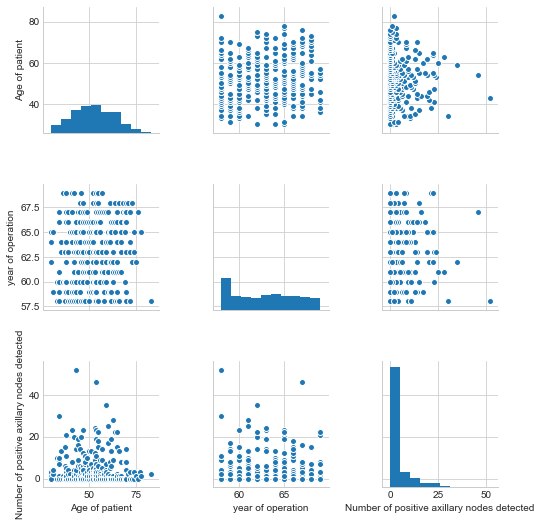

In [5]:
# Pair-plot:
# 3 features se pair plot bana sakte hai kya
plt.close();
sns.set_style("whitegrid");
g = sns.pairplot(haberman70, vars=['Age of patient', 'year of operation',
       'Number of positive axillary nodes detected'])    # hue="Survival status": In haberman70 dataset we want to color Survival status.
plt.show()
# Limitations: If we are having d = 1 to 7 features will help to plot a pair-plot.
#              But to visualize more than 7 features we need to use dimentions reductin technique(PCA, t-SNE)

### **Observation(s):**

1. I have 3 features so d = 3 so we can visualize 9 2-D Pair-Plots to undeerstand what dta is such data is called Pair-Plot.
2. Number of positive axillary nodes detected are the most useful features.
3. They are used to identify whether patient is suffering from disease or not.

# (1.5) 1-D scatter plot of petal-length

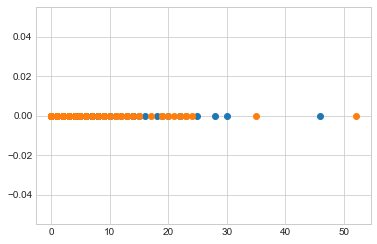

In [9]:
#1-D scatter plot of petal-length
# Getting Error
# haberman70_1,haberman70_2 se error aa raha hai

import numpy as np
haberman70_1 = haberman70.loc[haberman70["Survival status"] == 1];
haberman70_2 = haberman70.loc[haberman70["Survival status"] == 2];

plt.plot(haberman70_1["Number of positive axillary nodes detected"], np.zeros_like(haberman70_1['Number of positive axillary nodes detected']), 'o')
plt.plot(haberman70_2["Number of positive axillary nodes detected"], np.zeros_like(haberman70_2['Number of positive axillary nodes detected']), 'o')
plt.show()

Observertions:

1. Alot of overlapping.
2. Can not visualize the result properly.
3. Hard to make se sense as point.

# (1.6) Plotting Histogram of all features:

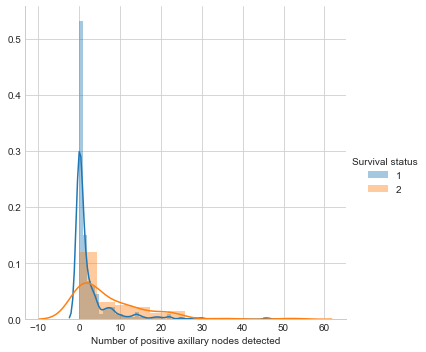

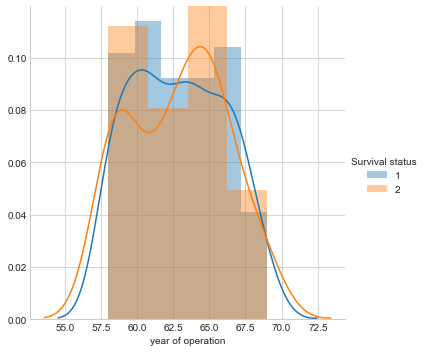

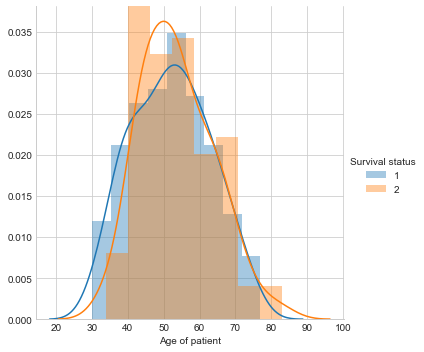

In [10]:
# Plotting Histogram of all features:
# Plotting Histogram On Number of positive axillary nodes detected
sns.FacetGrid(haberman70, hue="Survival status", size=5) \
   .map(sns.distplot, "Number of positive axillary nodes detected") \
   .add_legend();
plt.show();

# Plotting Histogram On year of operation
sns.FacetGrid(haberman70, hue="Survival status", size=5) \
   .map(sns.distplot, "year of operation") \
   .add_legend();
plt.show();

# Plotting Histogram On Age of patient
sns.FacetGrid(haberman70, hue="Survival status", size=5) \
   .map(sns.distplot, "Age of patient") \
   .add_legend();
plt.show();

Observations:

1. I found massive overlapping bitween point 1 and point 2 in all 3 features.
2. So there is no feature who seperate point 1 and point 2.
3. But "Number of positive axillary nodes detected" is significantly better than other 2 features.

# (1.7) pdf

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


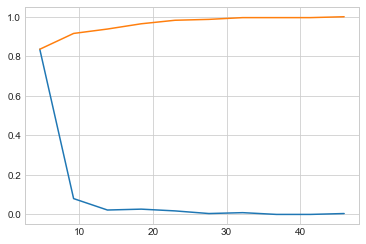

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


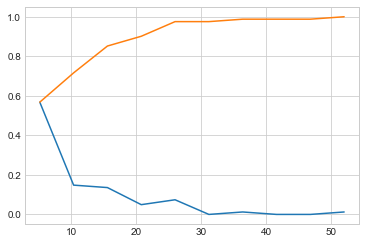

In [11]:
# pdf
# The bins parameter tell us the number of bins that pur data will be divided into. 
# we can specify it as an integer or as a list of bin edges.
#Plot CDF of petal_length

# haberman70_1
counts, bin_edges = np.histogram(haberman70_1['Number of positive axillary nodes detected'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show();

# haberman70_2
counts, bin_edges = np.histogram(haberman70_2['Number of positive axillary nodes detected'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show();

# (1.8) Mean, Variance and Std-dev

In [12]:
# Mean, Variance and Std-dev
# haberman70_1,haberman70_2 se error aa raha hai

print("Means:")
print(np.mean(haberman70_1["Survival status"]))
#Mean with an outlier.
print(np.mean(np.append(haberman70_1["Survival status"],73)));
print(np.mean(haberman70_2["Survival status"]))

print("\nStd-dev:");
print(np.std(haberman70_1["Survival status"]))
print(np.std(haberman70_2["Survival status"]))

Means:
1.0
1.3185840707964602
2.0

Std-dev:
0.0
0.0


Observations:

1. Survival status column value is either 1 or 2 so mean is 0.

# (1.9) Median, Quantiles, Percentiles, IQR.

In [13]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haberman70_1["Survival status"]))
#Median with an outlier
print(np.median(np.append(haberman70_1["Survival status"],73)));
print(np.median(haberman70_2["Survival status"]))

print("\nQuantiles:")
print(np.percentile(haberman70_1["Survival status"],np.arange(0, 100, 25)))
print(np.percentile(haberman70_2["Survival status"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman70_1["Survival status"],90))
print(np.percentile(haberman70_2["Survival status"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman70_1["Survival status"]))
print(robust.mad(haberman70_2["Survival status"]))


Medians:
1.0
1.0
2.0

Quantiles:
[1. 1. 1. 1.]
[2. 2. 2. 2.]

90th Percentiles:
1.0
2.0

Median Absolute Deviation
0.0
0.0


# (1.10) Box plot and Whiskers

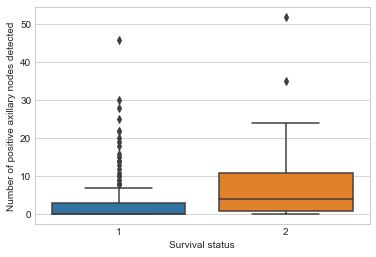

In [14]:
# Box plot and Whiskers
sns.boxplot(x='Survival status',y='Number of positive axillary nodes detected', data=haberman70)
plt.show()

Observations:
    
1. I have found point 1 is crossing the threshold what i have set for this point.
2. Point 2 is also crossing the threshold but there is only 2 points.
3. If Number of positive axillary nodes detected < 11 then it is point 2.

# (1.11) Violin plots

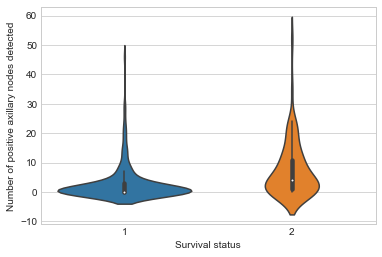

In [15]:
# Violin plots
sns.violinplot(x='Survival status',y='Number of positive axillary nodes detected', data=haberman70, size=8)
plt.show()

# (1.12) 2D Density plot, contors-plot

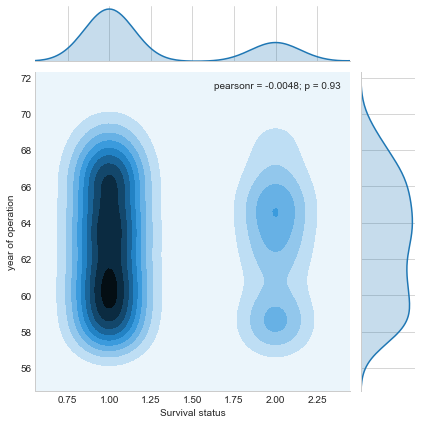

In [16]:
#2D Density plot, contors-plot
sns.jointplot(x='Survival status',y='year of operation', data= haberman70, kind="kde");
plt.show();

# (1.13) Observation

1. It is an unbalanced dataset.
2. We have 2 class label and we are not getting equal no. of data points for each of our class.
3. I see 74% of data points have value of 1. So they are surviving from the cancer.
4. Data points cannot be easily seperated by a single line.